In [67]:
import numpy as np
import thinfilm as tm
import material as ml
from material import sellmeier_fitting as sf
from scipy.optimize import basinhopping, minimize
import matplotlib.pyplot as plt

In [68]:
T_w = [411, 426.72, 444.34, 464.21, 488.98, 516.26, 548.05, 586.25, 628.18, 680, 742.65, 912.35, 1042.06, 1203, 1442.75]
T_n = [2.34786, 2.33138, 2.31109, 2.28202, 2.24594, 2.21702, 2.19754, 2.18272, 2.17144, 2.16102, 2.15008, 2.1045, 2.10095, 2.09569, 2.0885]
S_w = [492.6, 535.88, 585.9, 643.34, 732.46, 838.07, 962.84, 1161.82, 1425.45]
S_n = [1.44538, 1.43662, 1.42846, 1.4226, 1.41846, 1.41575, 1.41422, 1.41375, 1.41369]

In [69]:
TiO2 = ml.Sellmeier(sf(T_w, T_n))
SiO2 = ml.Sellmeier(sf(S_w, S_n))

requested number of basinhopping iterations completed successfully
requested number of basinhopping iterations completed successfully


In [70]:
TiO2_m = ml.Material(T_w, T_n)
SiO2_m = ml.Material(S_w, S_n)

In [71]:
air = ml.Non_Dispersion(1)
CrYAG = ml.Non_Dispersion(1.8)

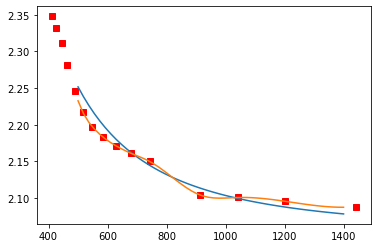

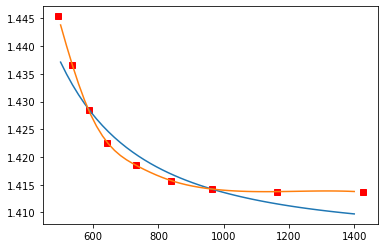

In [72]:
w_x = np.linspace(500, 1400) # nm
plt.plot(T_w, T_n, 'rs')
plt.plot(w_x, TiO2.nvalues(w_x))
plt.plot(w_x, TiO2_m.nvalues(w_x))
plt.show()
plt.plot(S_w, S_n, 'rs')
plt.plot(w_x, SiO2.nvalues(w_x))
plt.plot(w_x, SiO2_m.nvalues(w_x))
plt.show()

In [76]:
wl = np.linspace(1300, 1600)
R_target = np.zeros(np.size(wl))
def R_hypo(init):
    dS = init[0]
    dT = init[1]
    AR = tm.Design([air, SiO2, TiO2, CrYAG], [None, dS, dT, None])
    return AR.reflectance(wl)
fom = lambda theta: sum(abs(R_hypo(theta) - R_target))
sol = minimize(fom, [100, 300])

[274.05578229 381.80093347]


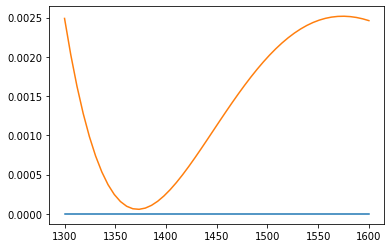

In [77]:
plt.plot(wl, R_target)
plt.plot(wl, R_hypo(sol.x))
print(sol.x)
plt.show()